In [1]:
from preprocessing import preprocess
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
train_file = "data/FRISS_ClaimHistory_training.csv"
test_file = "data/FRISS_ClaimHistory_test.csv"
fraud_file = "data/fraud_cases.csv"

In [3]:
train, test = preprocess(train_file, test_file, fraud_file)

Finished preprocessing.
Dropped 182 Train entries.
Dropped 43 Test entries.
Preprocessing took 2.69 seconds


In [4]:
# # Balance train
# fraud_entries = train[train["sys_fraud"] == 1]
# non_fraud_entries = train[train["sys_fraud"] == 0].sample(len(fraud_entries))
# train = fraud_entries.append(non_fraud_entries).sample(frac=1.0)

In [5]:
drop_cols = ['sys_claimid', 'occurred_year', 'occurred_month', 'occurred_day', 'reported_year', 'reported_month', 'reported_day']
test = test.drop(columns=drop_cols)
train = train.drop(columns=drop_cols)

In [6]:
def print_metrics(y, preds):
  print("- Accuracy: {0:.4f}".format(accuracy_score(preds, y)))
  print("- Balanced Accuracy: {0:.4f}".format(balanced_accuracy_score(y, preds)))
  print("- Precision: {0:.4f}".format(precision_score(preds, y)))
  print("- Recall: {0:.4f}".format(recall_score(preds, y)))
  print("- F1: {0:.4f}".format(f1_score(preds, y)))
  cm = confusion_matrix(y, preds)
  cmd_obj = ConfusionMatrixDisplay(cm) 
  cmd_obj.plot()

In [7]:
train.columns

Index(['claim_amount_claimed_total', 'claim_location_urban_area',
       'object_year_construction', 'policy_fleet_flag', 'sys_fraud',
       'claim_time_interval', 'cause_Animals', 'cause_Collision',
       'cause_Other', 'cause_Theft', 'cause_Weather', 'make_AUDI', 'make_BMW',
       'make_CITROEN', 'make_OPEL', 'make_OTHER', 'make_RENAULT',
       'make_VOLKSWAGEN', 'profitability_High', 'profitability_Low',
       'profitability_Neutral', 'profitability_Very high',
       'profitability_Very low', 'prev_claims'],
      dtype='object')

In [8]:
# # Basic Undersampling

# fraud_entries = train[train["sys_fraud"] == 1]
# non_fraud_entries = train[train["sys_fraud"] == 0].sample(len(fraud_entries))
# train = fraud_entries.append(non_fraud_entries).sample(frac=1.0)

In [9]:
# # Cluster Undersampling

# from imblearn.under_sampling import ClusterCentroids
# cc = ClusterCentroids(random_state=0)
# train, y = cc.fit_resample(train.drop(columns=["sys_fraud"]), train["sys_fraud"])
# train["sys_fraud"] = y
# train = train.sample(frac=1.0)

In [10]:
# # SMOTE over-sampling

# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# train, y = smote.fit_resample(train.drop(columns=["sys_fraud"]), train["sys_fraud"])
# train["sys_fraud"] = y
# train = train.sample(frac=1.0)

In [11]:
# # Over and Under sampling

# from imblearn.combine import SMOTEENN
# smoteenn = SMOTEENN()
# train, y = smoteenn.fit_resample(train.drop(columns=["sys_fraud"]), train["sys_fraud"])
# train["sys_fraud"] = y
# train = train.sample(frac=1.0)

In [12]:
# from imblearn.combine import SMOTETomek
# smote_tomek = SMOTETomek(random_state=0)
# train, y = smote_tomek.fit_resample(train.drop(columns=["sys_fraud"]), train["sys_fraud"])
# train["sys_fraud"] = y

# train = train.sample(frac=1.0)

In [13]:
# Random Undersampler

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
train, y = rus.fit_resample(train.drop(columns=["sys_fraud"]), train["sys_fraud"])

train["sys_fraud"] = y
train = train.sample(frac=1.0)

In [14]:
trainX = train.drop(columns=["sys_fraud"])
trainY = train["sys_fraud"]

testX = test.drop(columns=["sys_fraud"])
testY = test["sys_fraud"]

- Accuracy: 0.5982
- Balanced Accuracy: 0.5982
- Precision: 0.6250
- Recall: 0.5932
- F1: 0.6087


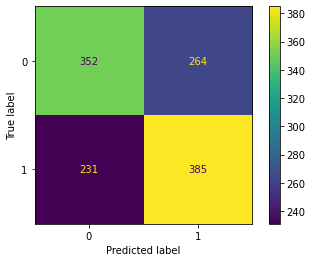

In [15]:
# Logistic Regression

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(trainX, trainY)

preds = LR.predict(trainX)
print_metrics(trainY, preds)

- Accuracy: 0.5449
- Balanced Accuracy: 0.5847
- Precision: 0.6250
- Recall: 0.0093
- F1: 0.0184


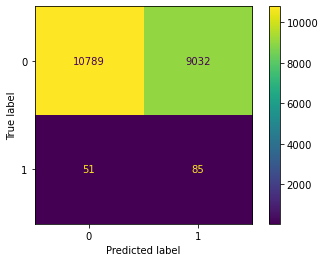

In [16]:
preds = LR.predict(testX)
print_metrics(testY, preds)

- Accuracy: 0.6006
- Balanced Accuracy: 0.6006
- Precision: 0.6201
- Recall: 0.5969
- F1: 0.6083


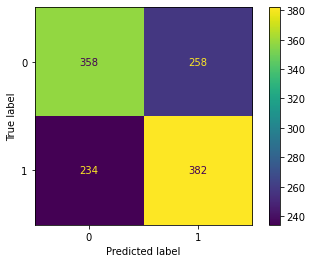

In [17]:
# Support vector machines

SVM = sk.svm.LinearSVC()
SVM.fit(trainX, trainY)

preds = SVM.predict(trainX)
print_metrics(trainY, preds)

- Accuracy: 0.5363
- Balanced Accuracy: 0.5073
- Precision: 0.4779
- Recall: 0.0070
- F1: 0.0139


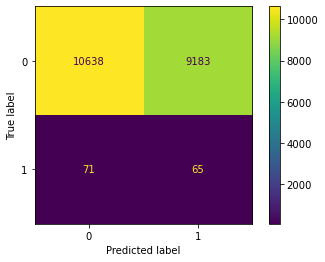

In [18]:
preds = SVM.predict(testX)
print_metrics(testY, preds)

- Accuracy: 0.7297
- Balanced Accuracy: 0.7297
- Precision: 0.7062
- Recall: 0.7411
- F1: 0.7232


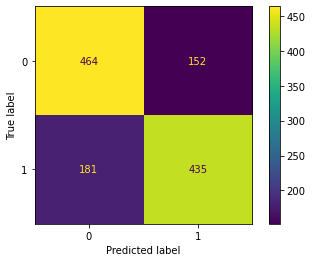

In [19]:
# Random forests
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=1000, max_depth=6, random_state=0)
RF.fit(trainX, trainY)

preds = RF.predict(trainX)
print_metrics(trainY, preds)

- Accuracy: 0.5604
- Balanced Accuracy: 0.4975
- Precision: 0.4338
- Recall: 0.0067
- F1: 0.0133


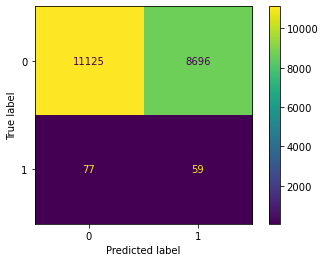

In [20]:
preds = RF.predict(testX)
print_metrics(testY, preds)

- Accuracy: 0.6664
- Balanced Accuracy: 0.6664
- Precision: 0.9334
- Recall: 0.6085
- F1: 0.7367


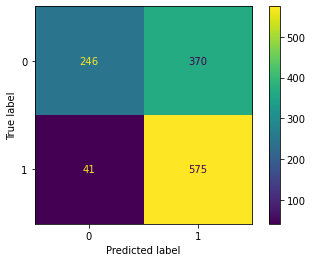

In [21]:
# Multi level perceptron
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(16, 8, 2), random_state=1, max_iter=10000)
NN.fit(trainX, trainY)

preds = NN.predict(trainX)
print_metrics(trainY, preds)

- Accuracy: 0.2669
- Balanced Accuracy: 0.5214
- Precision: 0.7794
- Recall: 0.0072
- F1: 0.0143


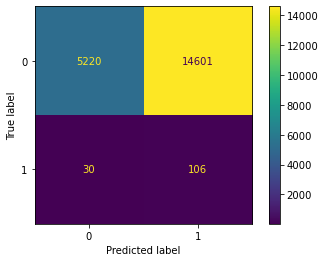

In [22]:
preds = NN.predict(testX)
print_metrics(testY, preds)